### Efficient frontier II

In [51]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline
import risk_toolkit as rk
import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
ind = rk.get_ind_returns()

exp_return = rk.annualized_returns(ind['1996':'2000'], 12)

cov = ind['1996':'2000'].cov()

In [53]:
l = ['Food', 'Beer', 'Smoke', 'Coal']

exp_return[l]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [54]:
cov.loc[l, l]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [55]:
weights = np.repeat(1/4, 4)

rk.portfolio_return(weights, exp_return[l])

0.19511097196038385

In [56]:
rk.portfolio_vol(weights, cov.loc[l, l])

0.055059195776437045

### 2 asset frontier

In [57]:
l = ['Games', 'Fin']

In [58]:
n_points = 20

weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)] # This generates a list comprehension
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

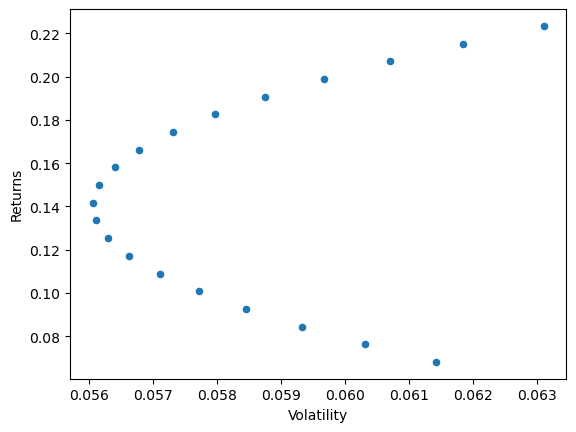

In [59]:
port_returns = [rk.portfolio_return(w, exp_return[l]) for w in weights]

port_vol = [rk.portfolio_vol(w, cov.loc[l, l]) for w in weights]

ef = pd.DataFrame({'Returns': port_returns, 'Volatility': port_vol})

ef.plot.scatter(x='Volatility', y='Returns')

### Let's try the function

<AxesSubplot:xlabel='Volatility'>

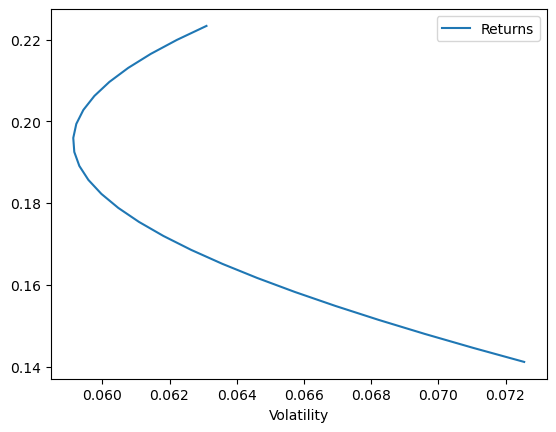

In [67]:
l = ['Fin', 'Beer']

rk.efficient_frontier_2_asset(25, exp_return[l], cov.loc[l, l], style='-')